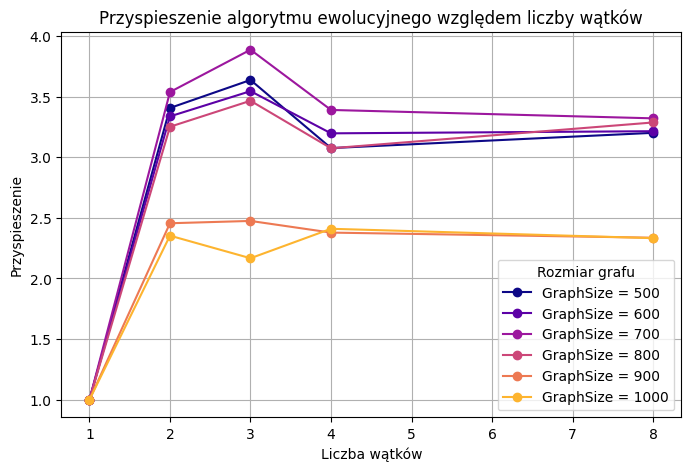

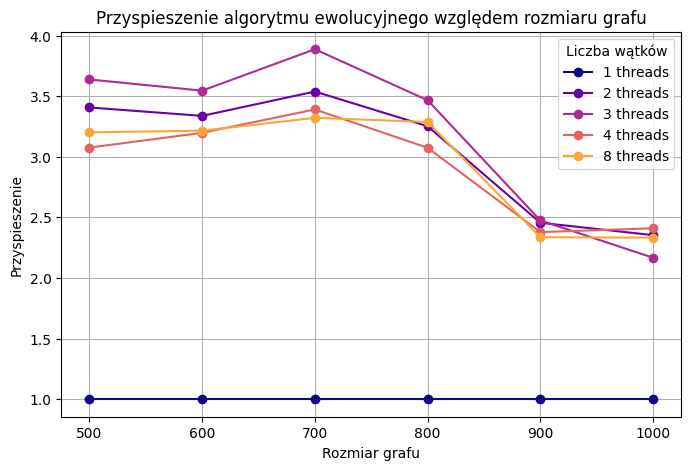

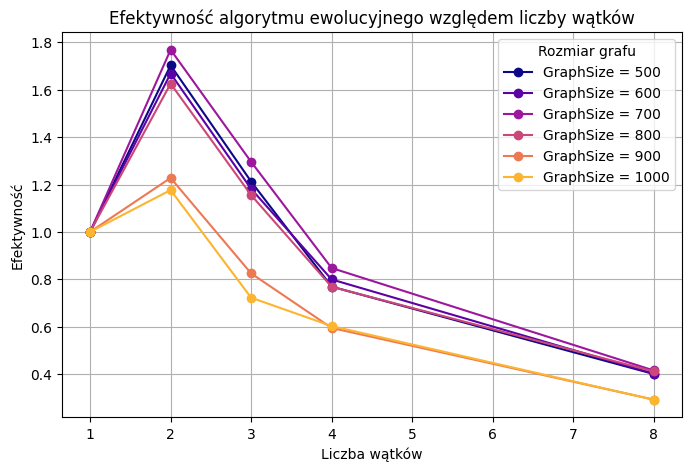

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
df = pd.read_csv("results.csv")

# Obliczanie przyspieszenia (independent dla każdego rozmiaru grafu)
df["Speedup"] = 0.0
for graph_size in df["GraphSize"].unique():
    # Wybór danych dla danego rozmiaru grafu
    graph_df = df[df["GraphSize"] == graph_size]
    
    # Uzyskiwanie czasu dla 1 wątku (sekwencyjnego) dla danego rozmiaru grafu
    baseline_time = graph_df[graph_df["Threads"] == 1]["Time(ms)"].values[0]
    
    # Obliczanie przyspieszenia
    df.loc[df["GraphSize"] == graph_size, "Speedup"] = baseline_time / df["Time(ms)"]

# Obliczanie efektywności
df["Efficiency"] = df["Speedup"] / df["Threads"]

# Przyspieszenie względem rozmiaru grafu
plt.figure(figsize=(8, 5))
cmap = plt.get_cmap("plasma")  # Użycie palety plasma
for i, graph_size in enumerate(df["GraphSize"].unique()):
    graph_df = df[df["GraphSize"] == graph_size]
    plt.plot(graph_df["Threads"], graph_df["Speedup"], marker='o', label=f'GraphSize = {graph_size}', color=cmap(i / len(df["GraphSize"].unique())))

plt.xlabel("Liczba wątków")
plt.ylabel("Przyspieszenie")
plt.title("Przyspieszenie algorytmu ewolucyjnego względem liczby wątków")
plt.legend(title="Rozmiar grafu")
plt.grid()
plt.show()

# Rysowanie wykresu przyspieszenia względem wielkości grafu
plt.figure(figsize=(8, 5))
for i, threads in enumerate(df["Threads"].unique()):
    thread_df = df[df["Threads"] == threads]
    plt.plot(thread_df["GraphSize"], thread_df["Speedup"], marker='o', label=f'{threads} threads', color=cmap(i / len(df["Threads"].unique())))

plt.xlabel("Rozmiar grafu")
plt.ylabel("Przyspieszenie")
plt.title("Przyspieszenie algorytmu ewolucyjnego względem rozmiaru grafu")
plt.legend(title="Liczba wątków")
plt.grid()
plt.show()

# Efektywność względem rozmiaru grafu
plt.figure(figsize=(8, 5))
for i, graph_size in enumerate(df["GraphSize"].unique()):
    graph_df = df[df["GraphSize"] == graph_size]
    plt.plot(graph_df["Threads"], graph_df["Efficiency"], marker='o', label=f'GraphSize = {graph_size}', color=cmap(i / len(df["GraphSize"].unique())))

plt.xlabel("Liczba wątków")
plt.ylabel("Efektywność")
plt.title("Efektywność algorytmu ewolucyjnego względem liczby wątków")
plt.legend(title="Rozmiar grafu")
plt.grid()
plt.show()



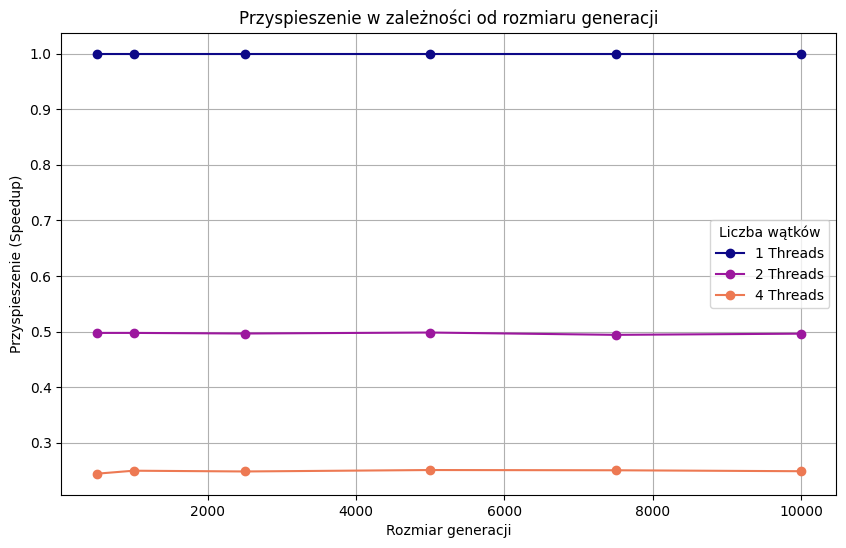

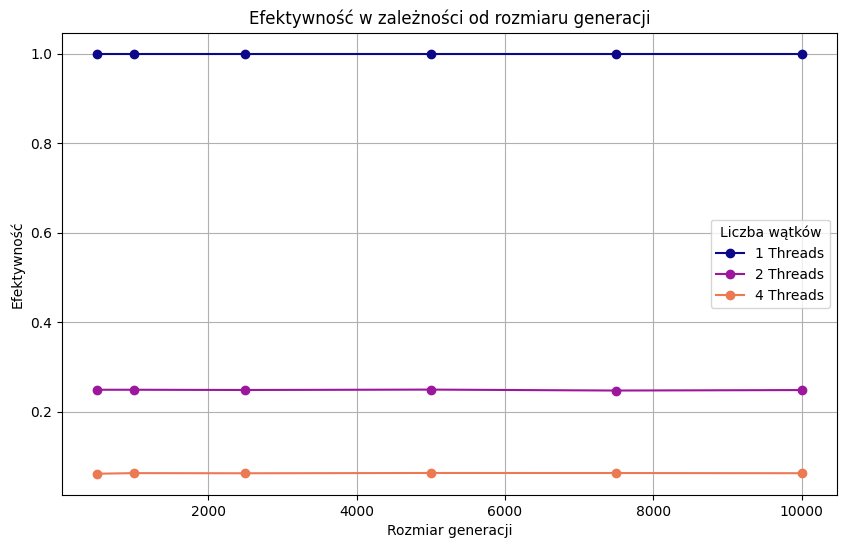

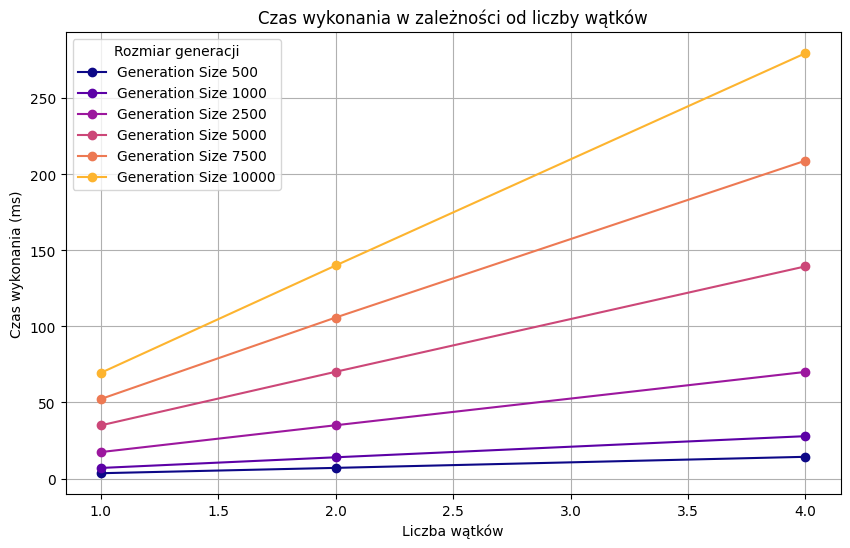

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie danych
df = pd.read_csv("results_generation.csv")

# Obliczenie wartości referencyjnych T1 (czas dla 8 procesów i 1 wątku) dla każdego rozmiaru generacji
df_T1 = df[(df["Processes"] == 8) & (df["Threads"] == 1)][["GenerationSize", "ExecutionTime"]]
df_T1.rename(columns={"ExecutionTime": "T1"}, inplace=True)

# Połączenie danych na podstawie GenerationSize, aby dodać kolumnę z czasem referencyjnym T1
df = df.merge(df_T1, on="GenerationSize", how="left")

# Obliczenie przyspieszenia (Speedup) jako stosunek T1 do ExecutionTime
df["Speedup"] = df["T1"] / df["ExecutionTime"]

# Obliczenie efektywności (Efficiency) jako przyspieszenie podzielone przez liczbę wątków
df["Efficiency"] = df["Speedup"] / df["Threads"]

# === WYKRES 1: Przyspieszenie w zależności od rozmiaru generacji ===
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap("plasma")  # Użycie palety plasma
for i, threads in enumerate(sorted(df["Threads"].unique())):
    subset = df[df["Threads"] == threads]
    plt.plot(subset["GenerationSize"], subset["Speedup"], marker='o', label=f"{threads} Threads", color=cmap(i / len(df["Threads"].unique())))

plt.xlabel("Rozmiar generacji")
plt.ylabel("Przyspieszenie (Speedup)")
plt.title("Przyspieszenie w zależności od rozmiaru generacji")
plt.legend(title="Liczba wątków")
plt.grid(True)
plt.show()

# === WYKRES 2: Efektywność w zależności od rozmiaru generacji ===
plt.figure(figsize=(10, 6))
for i, threads in enumerate(sorted(df["Threads"].unique())):
    subset = df[df["Threads"] == threads]
    plt.plot(subset["GenerationSize"], subset["Efficiency"], marker='o', label=f"{threads} Threads", color=cmap(i / len(df["Threads"].unique())))

plt.xlabel("Rozmiar generacji")
plt.ylabel("Efektywność")
plt.title("Efektywność w zależności od rozmiaru generacji")
plt.legend(title="Liczba wątków")
plt.grid(True)
plt.show()

# === WYKRES 3: Czas wykonania w zależności od liczby wątków ===
plt.figure(figsize=(10, 6))
for i, generation_size in enumerate(sorted(df["GenerationSize"].unique())):
    subset = df[df["GenerationSize"] == generation_size]
    plt.plot(subset["Threads"], subset["ExecutionTime"], marker='o', label=f"Generation Size {generation_size}", color=cmap(i / len(df["GenerationSize"].unique())))

plt.xlabel("Liczba wątków")
plt.ylabel("Czas wykonania (ms)")
plt.title("Czas wykonania w zależności od liczby wątków")
plt.legend(title="Rozmiar generacji")
plt.grid(True)
plt.show()


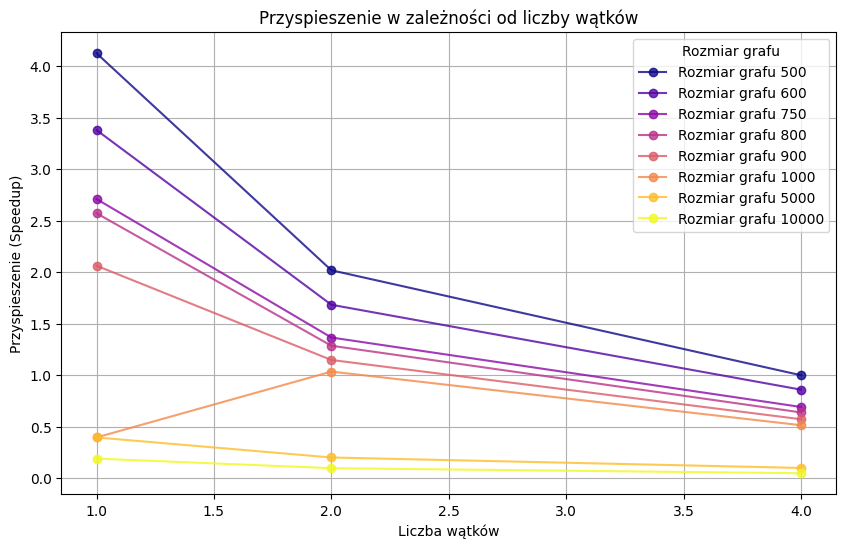

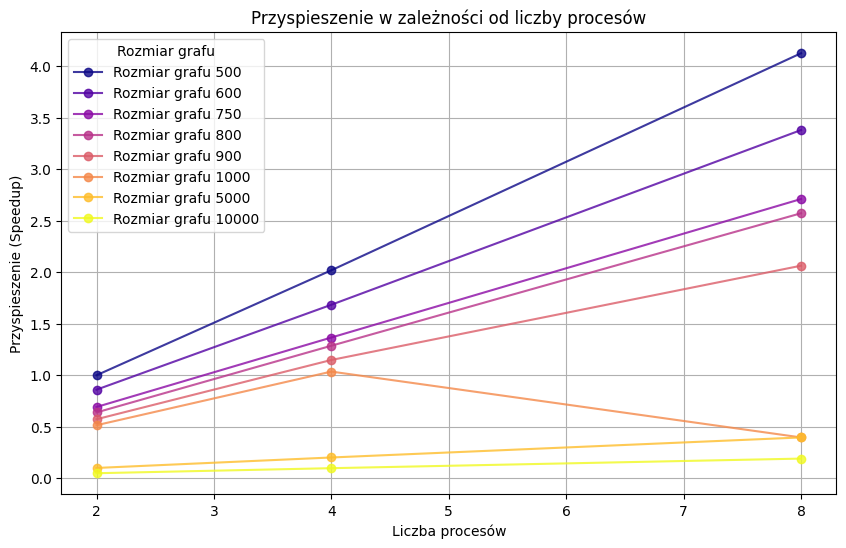

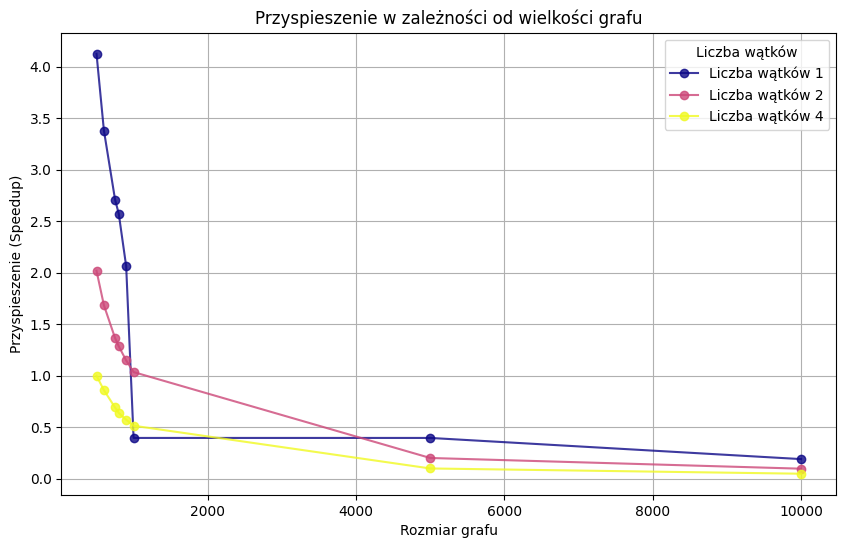

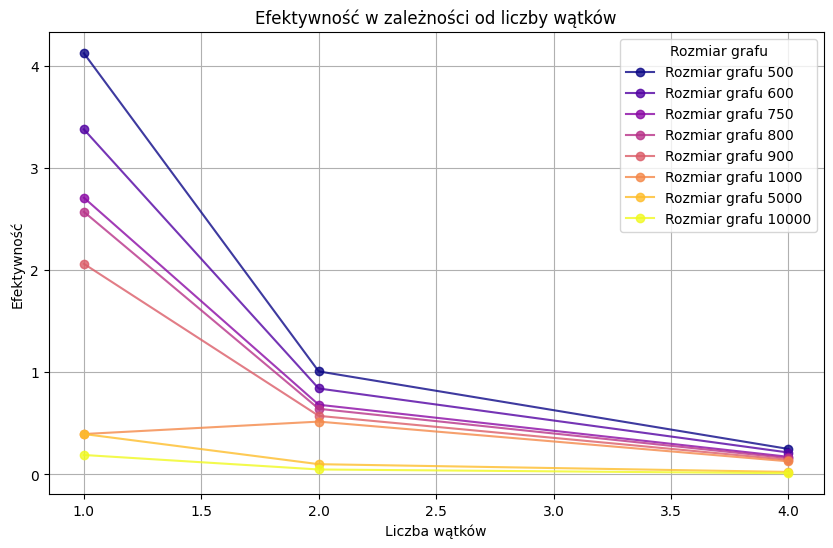

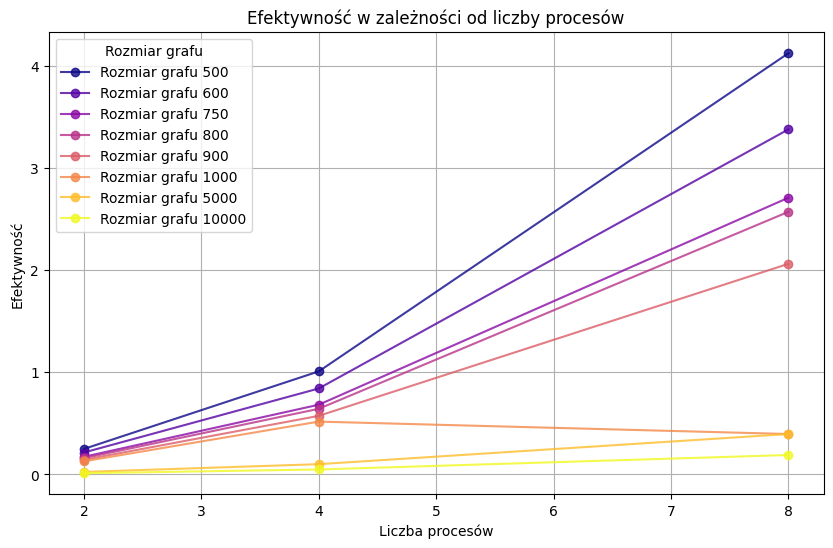

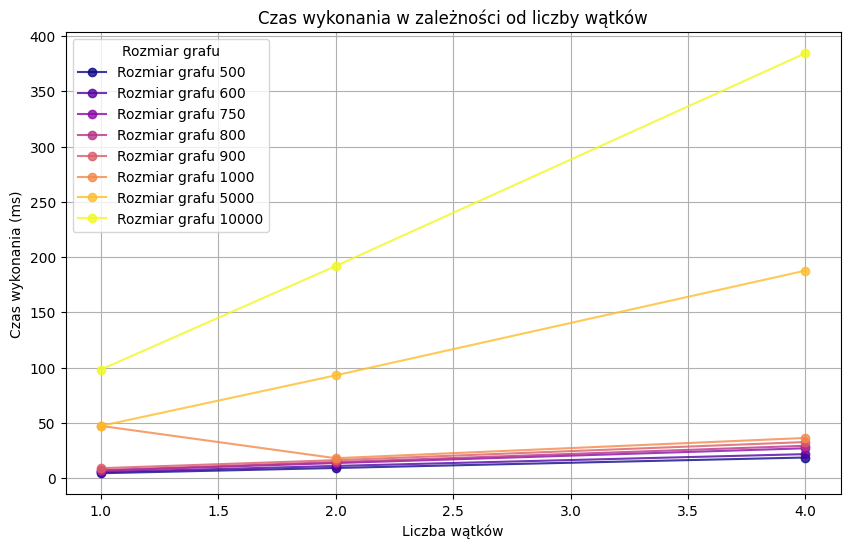

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Wczytanie danych
df = pd.read_csv("results1.csv")

# Obliczenie przyspieszenia (Speedup) i efektywności (Efficiency)
df["Speedup"] = df.iloc[0]["ExecutionTime"] / df["ExecutionTime"]
df["Efficiency"] = df["Speedup"] / df["Threads"]

# Funkcja do rysowania wykresów z różnymi kolorami dla różnych serii
def plot_with_distinct_colors(x, y, xlabel, ylabel, title, legend_title, category):
    plt.figure(figsize=(10, 6))
    
    unique_values = sorted(df[category].unique())  # Pobranie unikalnych wartości dla kategorii (np. GraphSize)
    cmap = cm.plasma  # Używamy mapy kolorów 'plasma'
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_values)-1)  # Normalizacja indeksów dla kolorów
    colors = [cmap(norm(i)) for i in range(len(unique_values))]  # Generowanie unikalnych kolorów
    
    for i, value in enumerate(unique_values):
        subset = df[df[category] == value]  # Wybór danych dla konkretnej wartości kategorii
        plt.plot(subset[x], subset[y], marker='o', label=f"{legend_title} {value}", color=colors[i], alpha=0.8)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title=legend_title)
    plt.grid(True)
    plt.show()


# === WYKRESY ===

# Wykres 1: Przyspieszenie w zależności od liczby wątków
plot_with_distinct_colors("Threads", "Speedup", "Liczba wątków", "Przyspieszenie (Speedup)", 
                          "Przyspieszenie w zależności od liczby wątków", "Rozmiar grafu", "GraphSize")

# Wykres 2: Przyspieszenie w zależności od liczby procesów
plot_with_distinct_colors("Processes", "Speedup", "Liczba procesów", "Przyspieszenie (Speedup)", 
                          "Przyspieszenie w zależności od liczby procesów", "Rozmiar grafu", "GraphSize")

# Wykres 3: Przyspieszenie w zależności od wielkości grafu
plot_with_distinct_colors("GraphSize", "Speedup", "Rozmiar grafu", "Przyspieszenie (Speedup)", 
                          "Przyspieszenie w zależności od wielkości grafu", "Liczba wątków", "Threads")

# Wykres 4: Efektywność w zależności od liczby wątków
plot_with_distinct_colors("Threads", "Efficiency", "Liczba wątków", "Efektywność", 
                          "Efektywność w zależności od liczby wątków", "Rozmiar grafu", "GraphSize")

# Wykres 5: Efektywność w zależności od liczby procesów
plot_with_distinct_colors("Processes", "Efficiency", "Liczba procesów", "Efektywność", 
                          "Efektywność w zależności od liczby procesów", "Rozmiar grafu", "GraphSize")

# Wykres 6: Czas wykonania w zależności od liczby wątków
plot_with_distinct_colors("Threads", "ExecutionTime", "Liczba wątków", "Czas wykonania (ms)", 
                          "Czas wykonania w zależności od liczby wątków", "Rozmiar grafu", "GraphSize")
